In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

# Plan of attack

* Find an investment property based on 2015 data: Jan 1 - dec 31
* "Invest" as of Jan 1 2016 and see if our investment held well

### Process
* Things to look at: start with price to rent as of dec 2015
* For the top 50 (lowest ptr) Find which ones had their rent grow the most from Jan 1 - dec 31
* Then compare growth of sales price
* Do this for one bed and two beds

In [2]:
# All data can be found here https://cl.ly/1p0w0327122j

price_to_rent = pd.read_csv('./data/price-to-rent-ratio.csv')
price_to_rent.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,10.0,9.91,9.73,...,11.72,11.77,12.14,12.17,12.21,12.34,12.54,12.61,12.57,12.64


In [3]:
price_to_rent.shape

(5683, 84)

In [75]:
start_date = '2015-01'
end_date = '2015-12'

start_i = price_to_rent.columns.get_loc(start_date)
end_i = price_to_rent.columns.get_loc(end_date)

ptr_for_date = price_to_rent.iloc[:, [3,2,1,end_i]]
sorted_ptr = ptr_for_date.sort_values("2015-12")
sorted_ptr["rank"] = range(1, len(sorted_ptr) + 1)

sorted_ptr.head(1)

,State,City,RegionName,2015-12,rank
2621,NY,East Hampton,Springs,2.37,1


In [29]:
# Find rent growth

rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,NaN,...,769.5,806.5,829.0,820.0,835.0,850.0,820.0,899.5,855.0,895.0


In [46]:
rental_1_room["2015_rent_growth"] = \
    (rental_1_room[end_date] - rental_1_room[start_date]) / rental_1_room[start_date]

rental_1_sorted = rental_1_room.sort_values("2015_rent_growth", ascending=False)
rental_1_sorted.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2015_growth,2015_rent_growth
234,Victoria Park,Fort Lauderdale,FL,Miami-Fort Lauderdale,Broward,235,NaN,NaN,NaN,NaN,...,1275.0,1350.0,1400.0,1450.0,1300.0,1275.0,1250.0,1350.0,0.3125,0.3125


In [32]:
purchase_1_room = pd.read_csv("./data/purchase-data/purchase/Neighborhood_Zhvi_1bedroom.csv")
purchase_1_room.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,270958,Upper West Side,New York,NY,New York,New York,1,NaN,NaN,NaN,...,862500.0,872800,884100,897000,909800,921100,929400,937500,951000,966800


In [47]:
purchase_1_room["2015_purchase_growth"] = \
    (purchase_1_room[end_date] - purchase_1_room[start_date]) / purchase_1_room[start_date]

purchase_1_sorted = purchase_1_room.sort_values("2015_purchase_growth", ascending=False)
purchase_1_sorted.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2015_purchase_growth
518,268614,Barnum,Denver,CO,Denver,Denver,519,49900.0,50900.0,52000.0,...,185300,186200,186200,188600,192400,196200,201000,207500,212800,0.307862


In [100]:
purchase_score = pd.concat([sorted_ptr["State"], sorted_ptr["City"], sorted_ptr["RegionName"], sorted_ptr["rank"], rental_1_sorted["2015_rent_growth"], purchase_1_sorted["2015_purchase_growth"]], axis=1)
purchase_score = purchase_score.dropna()
purchase_score.head(3)

,State,City,RegionName,rank,2015_rent_growth,2015_purchase_growth
0,TX,Dallas,Northeast Dallas,2660,-0.099545,0.027918
1,NV,Las Vegas,Paradise,3257,0.213846,0.063941
2,AZ,Phoenix,Maryvale,2427,0.003241,0.119200


In [101]:
ptr = .5
rent_growth = .3
purchase_growth = .2

purchase_score["score"] = (1 / purchase_score["rank"] * ptr) + \
   (purchase_score["2015_rent_growth"] * rent_growth) + (purchase_score["2015_purchase_growth"] * purchase_growth)
purchase_score.sort_values("score", ascending=False).head(10)


# Data to consider for future iterations: population growth, population density, occupancy rate, avg building year (lots of new construction can add supply putting downward pressure on price)
# Do prices rise after a construction glut, or do they stay leveled

,State,City,RegionName,rank,2015_rent_growth,2015_purchase_growth,score
59,CA,Los Angeles,Sylmar,4164,0.304348,0.113708,0.114166
208,CA,Eastvale,Corona Valley,4684,0.250625,0.184127,0.112120
234,CO,Colorado Springs,Southwest Colorado Springs,4211,0.312500,0.082327,0.110334
196,CA,Los Angeles,Watts,2908,0.234168,0.154787,0.101380
58,CA,San Jose,Evergreen,5309,0.156250,0.218795,0.090728
248,CA,Fresno,West,3245,0.200000,0.135684,0.087291
73,NY,New York,Far Rockaway,4011,0.166922,0.168928,0.083987
185,CA,Los Angeles,Mar Vista,5472,0.105263,0.258837,0.083438
256,PA,Philadelphia,Bustleton,2777,0.226931,0.064570,0.081173
1,NV,Las Vegas,Paradise,3257,0.213846,0.063941,0.077096


In [150]:
rental_1_room = pd.read_csv("./data/rental-1-room.csv")
start_date = '2015-01'
end_date = '2015-12'
start_i = rental_1_room.columns.get_loc(start_date)
end_i = rental_1_room.columns.get_loc(end_date) + 1

rental_1_sorted_date = rental_1_room.iloc[:, [3,2,1,end_i]]

rental_1_sorted_date = rental_1_room.iloc[:,start_i:end_i]
rental_1_sorted_date["State"] = rental_1_room.iloc[:,2]
grouped_rental = rental_1_sorted_date.groupby("State").mean()

grouped_rental.rename(columns={
        '2015-01': '01',
        '2015-02': '02',
        '2015-03': '03',
        '2015-04': '04',
        '2015-05': '05',
        '2015-06': '06',
        '2015-07': '07',
        '2015-08': '08',
        '2015-09': '09',
        '2015-10': '10',
        '2015-11': '11',
        '2015-12': '12',
    }, inplace=True)

rental_transposed = rental_1_sorted_date.T

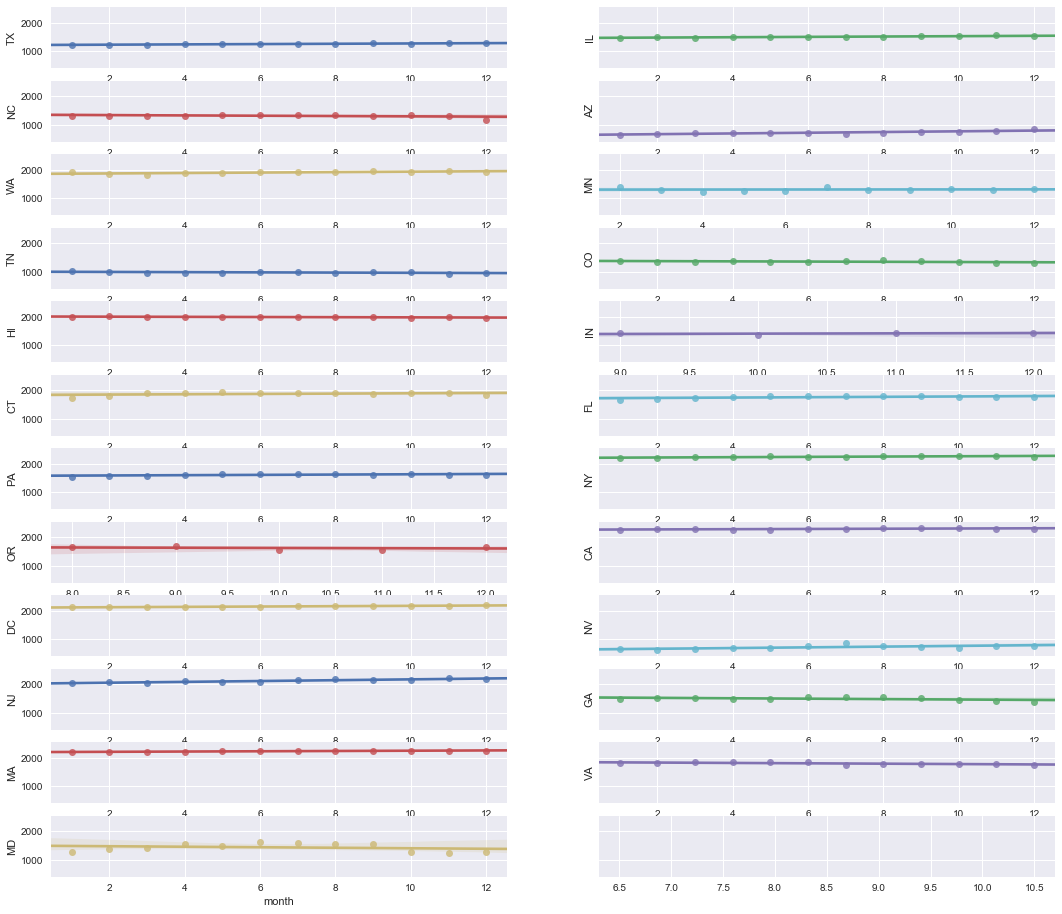

In [163]:
import seaborn as sns; sns.set(color_codes=True)

rental_transposed['month'] = range(1,13)
states = { s for s in rental_1_sorted_date['State'] }
states = list(states)

i = 0
f, axes = plt.subplots(12, 2, sharey=True, figsize=(18, 16))

for row in axes:
    for col in row:
        if i < len(states):
            sns.regplot(x='month', y=states[i], data=rental_transposed, ax=col)
            i+=1

## Questions

- How should one deal with dropna()? Right now we're losing a lot of data. This is bc one of our data sets is small.
- How can we do the seaborn graph? http://seaborn.pydata.org/generated/seaborn.regplot.html
- How should we assess the results?


goal = score
  - ptr = 40%
  - how much rent grew = 40%
  - sales price growth = 20%

this is reasonable but arbitrary

- use seaborn for a regression plot (http://seaborn.pydata.org/generated/seaborn.regplot.html)
  - plot the key metrics: rent growth, sales growth
  - use that to inform the weight  
  - focus on 2015. each month is a data point (x axis)
  - you'll end up with 1 graph per state
  ```int(re.sub(month_name, '-', ''))``` => turn month names into integers and make that the index (or just take the month ```int(.str.plit("-"))```
  
- Create a scoring function where we can change the weights and re-calculate based on it

In [98]:
# How 100% sure how to assess the results

start_date = '2016-01'
end_date = '2016-12'

rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room["2016_rent_growth"] = \
    (rental_1_room[end_date] - rental_1_room[start_date]) / rental_1_room[start_date]

purchase_1_room = pd.read_csv("./data/purchase-data/purchase/Neighborhood_Zhvi_1bedroom.csv")
purchase_1_room["2016_purchase_growth"] = \
    (purchase_1_room[end_date] - purchase_1_room[start_date]) / purchase_1_room[start_date]
    
purchase_score = pd.concat([rental_1_room["State"], rental_1_room["City"], rental_1_room["RegionName"], rental_1_room["2016_rent_growth"], purchase_1_room["2016_purchase_growth"]], axis=1)
purchase_score = purchase_score.dropna()

rent_growth = .5
sales_growth = .5

purchase_score["score"] = (purchase_score["2016_rent_growth"] * rent_growth) + (purchase_score["2016_purchase_growth"] * sales_growth)
purchase_score.sort_values("score", ascending=False).head(10)

,State,City,RegionName,2016_rent_growth,2016_purchase_growth,score
174,CA,Long Beach,Alamitos Beach,0.210000,0.118778,0.164389
164,MA,Boston,Kenmore,0.132530,0.182803,0.157666
0,TX,Dallas,Northeast Dallas,0.175817,0.111177,0.143497
13,TX,Dallas,Far North,0.049031,0.234711,0.141871
22,NY,New York,East Harlem,0.171739,0.111800,0.141770
5,NY,New York,East New York,0.107143,0.159432,0.133287
14,CA,Los Angeles,Hollywood,0.076696,0.189076,0.132886
76,CA,Los Angeles,Mid City West,0.081960,0.173776,0.127868
111,NY,New York,Fort Hamilton,0.018750,0.229927,0.124339
115,VA,Alexandria,Alexandria West,0.007663,0.234892,0.121277
